In [70]:
import numpy as np
import matplotlib.pyplot as plt


# Question 2b

x0 = np.array([0, 0]).reshape(2, 1)
b = np.array([4.5, 6]).reshape(2, 1)
f = lambda x: np.sqrt( np.dot( (x - b).T, (x - b) ) )
delta_f = lambda x: (x - b) / np.sqrt( np.dot( (x - b).T, (x - b) ) )

for _ in range(10):
    x0 = x0 - delta_f(x0)
    print(x0.flatten(), f(x0).flatten())

[ 0.6  0.8] [ 6.5]
[ 1.2  1.6] [ 5.5]
[ 1.8  2.4] [ 4.5]
[ 2.4  3.2] [ 3.5]
[ 3.  4.] [ 2.5]
[ 3.6  4.8] [ 1.5]
[ 4.2  5.6] [ 0.5]
[ 4.8  6.4] [ 0.5]
[ 4.2  5.6] [ 0.5]
[ 4.8  6.4] [ 0.5]


In [73]:
# Question 2c

x0 = np.array([0, 0]).reshape(2, 1)
b = np.array([3, 4]).reshape(2, 1)
f = lambda x: np.sqrt( np.dot( (x - b).T, (x - b) ) )
delta_f = lambda x: (x - b) / np.sqrt( np.dot( (x - b).T, (x - b) ) )

for i in range(10):
    x0 = x0 - (5 / 6) ** i * delta_f(x0)
    print(x0.flatten(), f(x0).flatten())

[ 0.6  0.8] [ 4.]
[ 1.1         1.46666667] [ 3.16666667]
[ 1.51666667  2.02222222] [ 2.47222222]
[ 1.86388889  2.48518519] [ 1.89351852]
[ 2.15324074  2.87098765] [ 1.41126543]
[ 2.39436728  3.19248971] [ 1.00938786]
[ 2.59530607  3.46040809] [ 0.67448988]
[ 2.76275506  3.68367341] [ 0.39540824]
[ 2.90229588  3.86972784] [ 0.1628402]
[ 3.0185799  4.0247732] [ 0.0309665]


In [56]:
# Question 2d

x0 = np.array([0, 0]).reshape(2, 1)
b = np.array([4.5, 6]).reshape(2, 1)
f = lambda x: np.sqrt( np.dot( (x - b).T, (x - b) ) )
delta_f = lambda x: (x - b) / np.sqrt( np.dot( (x - b).T, (x - b) ) )

for i in range(10):
    x0 = x0 - 1 / (i + 1) * delta_f(x0)
    print(x0.flatten(), f(x0).flatten())

[ 0.6  0.8] [ 6.5]
[ 0.9  1.2] [ 6.]
[ 1.1         1.46666667] [ 5.66666667]
[ 1.25        1.66666667] [ 5.41666667]
[ 1.37        1.82666667] [ 5.21666667]
[ 1.47  1.96] [ 5.05]
[ 1.55571429  2.07428571] [ 4.90714286]
[ 1.63071429  2.17428571] [ 4.78214286]
[ 1.69738095  2.2631746 ] [ 4.67103175]
[ 1.75738095  2.3431746 ] [ 4.57103175]


[[1 0]
 [0 1]]


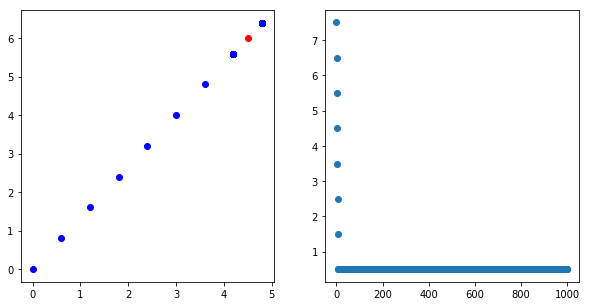

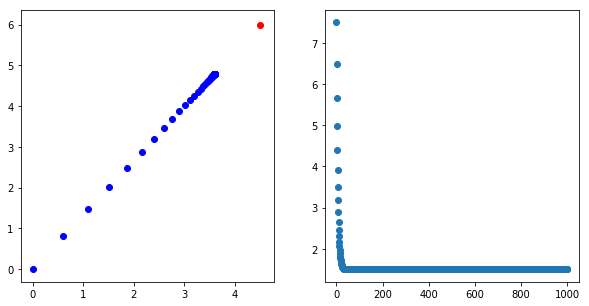

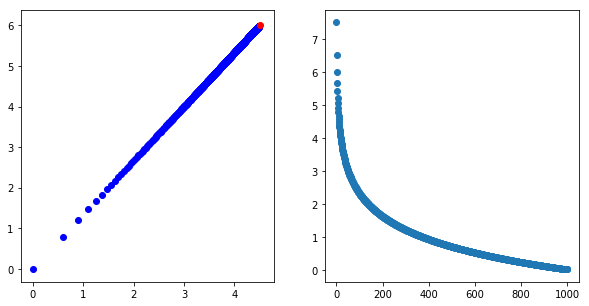

[[10  0]
 [ 0  1]]


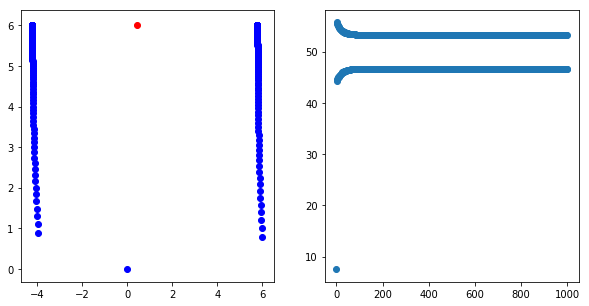

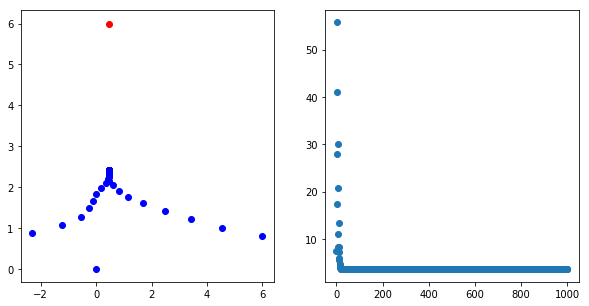

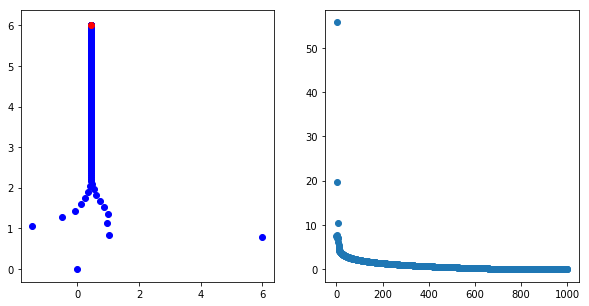

[[15  8]
 [ 6  5]]


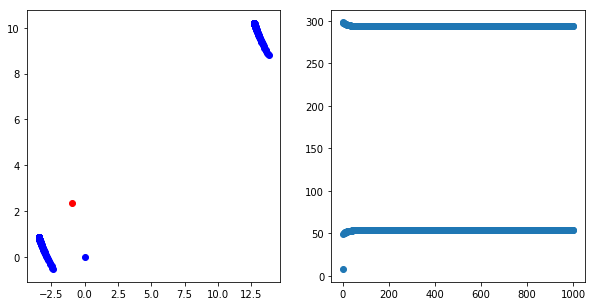

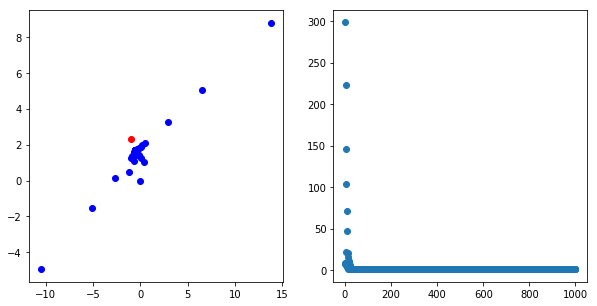

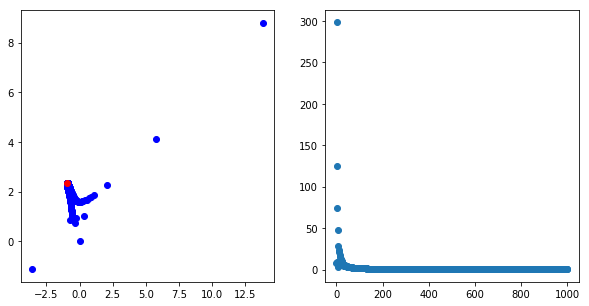

In [65]:
def main(A, step_size):
    ################################################################################
    # TODO(student): Input Variables
    A  # do not change this until the last part
    b = np.array([4.5, 6])  # b in the equation ||Ax-b||
    initial_position = np.array([0, 0])  # position at iteration 0
    total_step_count = 1000  # number of GD steps to take
    step_size  # step size at iteration i
    ################################################################################

    # computes desired number of steps of gradient descent
    positions = compute_updates(A, b, initial_position, total_step_count, step_size)

    # print out the values of the x_i
#     print(positions)
#     print(np.dot(np.linalg.inv(A), b))

    fig = plt.figure(figsize=(10, 5))
    # plot the values of the x_i
    ax1 = fig.add_subplot(121)
    ax1.scatter(positions[:, 0], positions[:, 1], c='blue')
    ax1.scatter(np.dot(np.linalg.inv(A), b)[0],
                np.dot(np.linalg.inv(A), b)[1], c='red')
    ax1.plot()
    
    # plot the values of f
    f = []
    for x in positions:
        f.append( np.linalg.norm(A.dot(x) - b) )
    ax2 = fig.add_subplot(122)
    ax2.plot(f, "o")
    plt.show()


def compute_gradient(A, b, x):
    """Computes the gradient of ||Ax-b|| with respect to x."""
    return np.dot(A.T, (np.dot(A, x) - b)) / np.linalg.norm(np.dot(A, x) - b)


def compute_update(A, b, x, step_count, step_size):
    """Computes the new point after the update at x."""
    return x - step_size(step_count) * compute_gradient(A, b, x)


def compute_updates(A, b, p, total_step_count, step_size):
    """Computes several updates towards the minimum of ||Ax-b|| from p.

    Params:
        b: in the equation ||Ax-b||
        p: initialization point
        total_step_count: number of iterations to calculate
        step_size: function for determining the step size at step i
    """
    positions = [np.array(p)]
    for k in range(total_step_count):
        positions.append(compute_update(A, b, positions[-1], k, step_size))
    return np.array(positions)


A = np.array([[1, 0], [0, 1]])
step_size = lambda i: 1
print(A)
main(A, step_size)

A = np.array([[1, 0], [0, 1]])
step_size = lambda i: (5 / 6) ** i
main(A, step_size)

A = np.array([[1, 0], [0, 1]])
step_size = lambda i: 1 / (i + 1)
main(A, step_size)


A = np.array([[10, 0], [0, 1]])
step_size = lambda i: 1
print(A)
main(A, step_size)

A = np.array([[10, 0], [0, 1]])
step_size = lambda i: (5 / 6) ** i
main(A, step_size)

A = np.array([[10, 0], [0, 1]])
step_size = lambda i: 1 / (i + 1)
main(A, step_size)


A = np.array([[15, 8], [6, 5]])
step_size = lambda i: 1
print(A)
main(A, step_size)

A = np.array([[15, 8], [6, 5]])
step_size = lambda i: (5 / 6) ** i
main(A, step_size)

A = np.array([[15, 8], [6, 5]])
step_size = lambda i: 1 / (i + 1)
main(A, step_size)



In [106]:
# Question 4

import scipy.spatial

def gradient(position, locations, distances):
    df_dx1_vector = 2 * (position[0] - locations[:, 0] - \
                  distances * (position[0] - locations[:, 0]) \
                  / np.sqrt( (locations[:, 0] - position[0]) ** 2 + (locations[:, 1] - position[1]) ** 2 ))
    df_dx1 = np.sum(df_dx1_vector)
                  
    df_dy1_vector = 2 * (position[1] - locations[:, 1] - \
                  distances * (position[1] - locations[:, 1]) \
                  / np.sqrt( (locations[:, 0] - position[0]) ** 2 + (locations[:, 1] - position[1]) ** 2))
    df_dy1 = np.sum(df_dy1_vector)
    return np.array([df_dx1, df_dy1])
                  

########################################################################
#########  Data Generating Functions ###################################
########################################################################
def generate_sensors(k = 7, d = 2):
	"""
	Generate sensor locations. 
	Input:
	k: The number of sensors.
	d: The spatial dimension.
	Output:
	sensor_loc: k * d numpy array.
	"""
	sensor_loc = 100*np.random.randn(k,d)
	return sensor_loc

def generate_data(sensor_loc, k = 7, d = 2, 
				 n = 1, original_dist = True):
	"""
	Generate the locations of n points.  

	Input:
	sensor_loc: k * d numpy array. Location of sensor. 
	k: The number of sensors.
	d: The spatial dimension.
	n: The number of points.
	original_dist: Whether the data are generated from the original 
	distribution. 

	Output:
	obj_loc: n * d numpy array. The location of the n objects. 
	distance: n * k numpy array. The distance between object and 
	the k sensors. 
	"""
	assert k, d == sensor_loc.shape

	obj_loc = 100*np.random.randn(n, d)
	if not original_dist:
	   obj_loc += 1000
	   
	distance = scipy.spatial.distance.cdist(obj_loc, 
										   sensor_loc, 
										   metric='euclidean')
	distance += np.random.randn(n, k)  
	return obj_loc, distance
##################################################################
# Starter code for Part (b)
##################################################################
np.random.seed(0)
sensor_loc = generate_sensors()
obj_loc, distance = generate_data(sensor_loc)
print("Generated location:")
print(obj_loc.flatten())
distance = distance.flatten()

start = np.array([0, 0])

for i in range(1, 1000):
    start = start - 1 / (i + 1) * gradient(start, sensor_loc, distance)

print("Gradient Descent result:")
print(start)


##################################################################
# Starter code for Part (c)
##################################################################
def generate_data_given_location(sensor_loc, obj_loc, k = 7, d = 2):
	"""
	Generate the distance measurements given location of a single object and sensor. 

	Input:
	obj_loc: 1 * d numpy array. Location of object
	sensor_loc: k * d numpy array. Location of sensor. 
	k: The number of sensors.
	d: The spatial dimension. 

	Output: 
	distance: 1 * k numpy array. The distance between object and 
	the k sensors. 
	"""
	assert k, d == sensor_loc.shape 
	 
	distance = scipy.spatial.distance.cdist(obj_loc, 
					   sensor_loc, 
					   metric='euclidean')
	distance += np.random.randn(1, k)  
	return obj_loc, distance

def log_likelihood(obj_loc, sensor_loc, distance): 
	"""
	This function computes the log likelihood (as expressed in Part a).
	Input: 
	obj_loc: shape [1,2]
	sensor_loc: shape [7,2]
	distance: shape [7]
	Output: 
	The log likelihood function value. 
	"""  
	diff_distance = np.sqrt(np.sum((sensor_loc - obj_loc)**2, axis = 1))- distance
	func_value = -sum((diff_distance)**2)/2
	return func_value


np.random.seed(100)
# Sensor locations. 
sensor_loc = generate_sensors()
num_gd_replicates = 100

# Object locations. 
obj_locs = [[[i,i]] for i in np.arange(100,1000,100)]

Generated location:
[ 44.38632327  33.36743274]
Gradient Descent result:
[ 43.07188433  32.71217817]
